# Chess.com Data Overview

## Objective

This notebook conducts an initial exploration of all available datasets. It includes examining the structure and summary statistics of each table, analyzing individual columns, and identifying potential relationships and influencing factors for key metrics.

# Importing Required Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Import all datasets to be analyzed

In [2]:
leaders = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/chesscom_all_leaders.csv')
details = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/top_players_detailed_info.csv')
games_09_25 = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/all_players_games_2025_09.csv')

2. Examined dataset structure and content, identified and handled duplicates, missing, and irrelevant values during data cleaning.

### Leaders table

In [5]:
leaders

,type,rank,username,score,country
0,live_blitz,1,MagnusCarlsen,3333,https://api.chess.com/pub/country/NO
1,live_blitz,2,Hikaru,3299,https://api.chess.com/pub/country/US
2,live_blitz,3,DenLaz,3260,https://api.chess.com/pub/country/BY
3,live_blitz,4,nihalsarin,3244,https://api.chess.com/pub/country/IN
4,live_blitz,5,LyonBeast,3241,https://api.chess.com/pub/country/FR
...,...,...,...,...,...
195,daily,46,AndersNM,2336,https://api.chess.com/pub/country/NO
196,daily,47,AndreyKubatko,2335,https://api.chess.com/pub/country/RU
197,daily,48,Razzeldazzel,2334,https://api.chess.com/pub/country/SE
198,daily,49,roughest,2333,https://api.chess.com/pub/country/BR


In [6]:
leaders['type'].unique()

array(['live_blitz', 'live_bullet', 'live_rapid', 'daily'], dtype=object)

The Leaders table contains information about the top 50 players in the rankings for different types of chess activities on the Chess.com platform.

Columns:

`type` — the type of activity to which the ranking belongs. It can take one of four values: 'live_blitz', 'live_bullet', 'live_rapid', 'daily'. These values correspond to game formats with different time controls.

`rank` — the player’s position in the respective ranking (an integer from 1 to 50).

`username` — the unique username of a player on Chess.com. The same username may appear multiple times if a player is ranked in the top 50 for several different activity types.

`score` — the number of points earned by the player in a specific activity.

`country` — a URL indicating the player’s country, for example: https://api.chess.com/pub/country/NO. The last two letters (NO) represent the country code according to the ISO 3166-1 alpha-2 standard.

In [9]:
leaders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      200 non-null    object
 1   rank      200 non-null    int64 
 2   username  200 non-null    object
 3   score     200 non-null    int64 
 4   country   200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [10]:
leaders.describe(include = 'all')

,type,rank,username,score,country
count,200,200.000000,200,200.000000,200
unique,4,NaN,159,NaN,57
top,live_blitz,NaN,MagnusCarlsen,NaN,https://api.chess.com/pub/country/US
freq,50,NaN,3,NaN,42
mean,NaN,25.500000,NaN,2875.820000,NaN
std,NaN,14.467083,NaN,330.760822,NaN
min,NaN,1.000000,NaN,2332.000000,NaN
25%,NaN,13.000000,NaN,2658.500000,NaN
50%,NaN,25.500000,NaN,3034.000000,NaN
75%,NaN,38.000000,NaN,3155.250000,NaN


In [27]:
unique_leaders_us = leaders.loc[leaders['country'] == 'https://api.chess.com/pub/country/US', 'username'].nunique()
print(unique_leaders_us)


35


The table contains 200 records and 5 columns: two numerical (rank and score) and three categorical (type, username, country). There are no missing values, which allows for a complete analysis without additional data cleaning.

The username column contains 159 unique players, indicating that some players appear in multiple activities. The most frequently appearing player is MagnusCarlsen, represented in 3 out of 4 activities.

The country column includes 57 unique countries. The largest number of leaders come from the USA — 42 records, corresponding to 35 unique players (≈22% of all unique players).

Quartile analysis shows that the distribution is asymmetric and skewed toward higher values: the interval between Q1 and Q2 (3034 − 2658.5 = 375.5) is considerably larger than that between Q2 and Q3 (3155.25 − 3034 = 121.25), indicating a clustering of players with high scores.

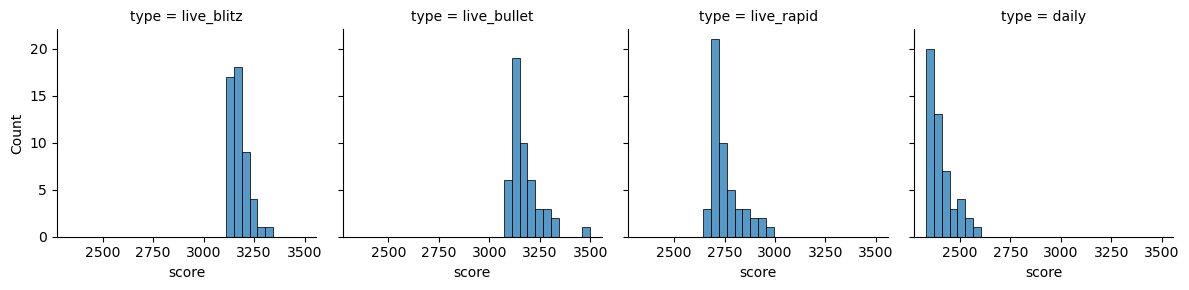

In [69]:
a = sns.displot(
    data=leaders,
    x='score',
    bins=30,
    col='type',
    height=3,
    aspect=1
)

g.fig.suptitle('Distribution of Scores by Activity Type', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.88)

g.set_axis_labels("Score", "Count")

plt.show()

The overall distribution of scores among the leaders is clustered and left-skewed (negatively skewed), with a pronounced concentration of players in the 3100–3200 range for live_blitz and live_bullet, around 2650-2700 for live_rapid, and 2300–2350 for daily. The type of activity has a significant impact on the score distribution, as the spread and shape of the distribution vary depending on the category. This can be explained by the specific rules of each activity, particularly the duration of a single game (ranging from 1 minute to 1 day). Since fewer leaders participate in rapid and daily games, they accordingly accumulate fewer points in these categories.